In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
import cv2 as cv

## Loading Data

In [57]:
dataDir = "C:\D\College Stuff\Semester 4\Summer Internship\Parking-Spot-Detection\Resources\dataset"
data = tf.keras.utils.image_dataset_from_directory(dataDir, batch_size=300, image_size=(49,109))

Found 18600 files belonging to 2 classes.


In [58]:
dataIterator = data.as_numpy_iterator()


In [59]:
batch = dataIterator.next()


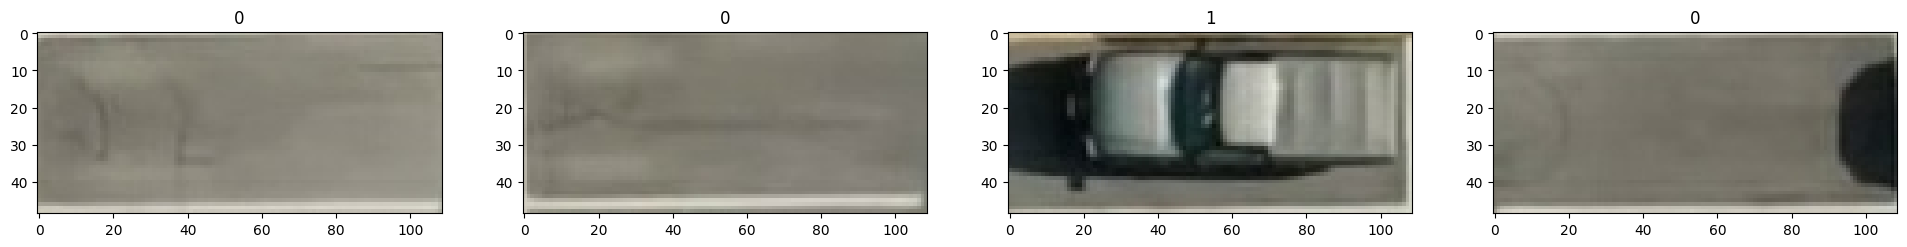

In [60]:
fig, ax = plt.subplots(ncols=4, figsize=(24,54))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data

In [61]:
data = data.map(lambda x,y: (x/255, y))


In [34]:
# data.as_numpy_iterator().next()

## Split Data

In [62]:
trainSize = int(len(data)*.7)
valSize = int(len(data)*.2)
testSize = int(len(data)*.1)


In [63]:
trainDataSet = data.take(trainSize)
valDataSet = data.skip(trainSize).take(valSize)
testDataSet = data.skip(trainSize+valSize).take(testSize)


## Building Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [65]:
model = Sequential()

In [66]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(49,109,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [69]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 47, 107, 16)       448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 53, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 51, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 23, 16)         4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 11, 16)       

## Training the Data

In [70]:
logdir='logs'
tensorboardCallback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
hist = model.fit(trainDataSet, epochs=4, validation_data=valDataSet, callbacks=[tensorboardCallback])

Epoch 1/4
43/43 [==============================] - 83s 2s/step - loss: 0.1842 - accuracy: 0.9188 - val_loss: 0.0134 - val_accuracy: 0.9961
Epoch 2/4
43/43 [==============================] - 82s 2s/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.0069 - val_accuracy: 0.9975
Epoch 3/4
43/43 [==============================] - 86s 2s/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.0034 - val_accuracy: 0.9986
Epoch 4/4
43/43 [==============================] - 84s 2s/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0055 - val_accuracy: 0.9983


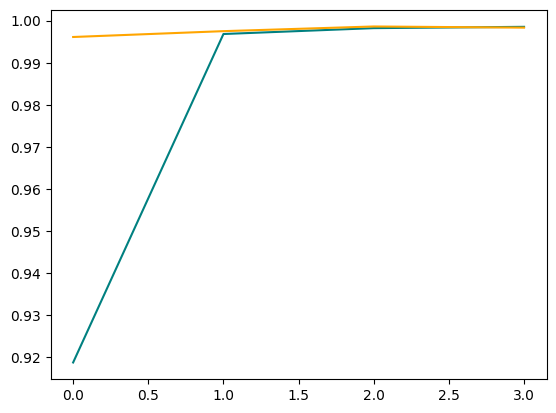

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.show()

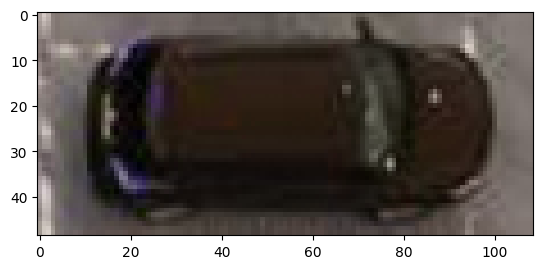

In [99]:
img = cv.imread("occTest1.jpg")
plt.imshow(img)
plt.show()

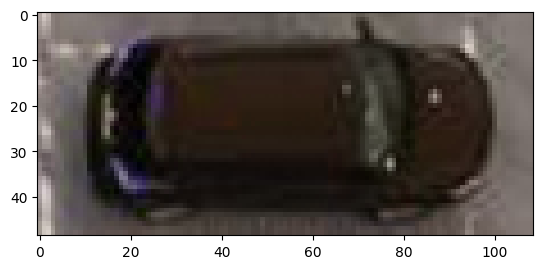

In [100]:
resize = tf.image.resize(img, (49,109))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 52ms/step


In [102]:
yhat

array([[0.99990666]], dtype=float32)

In [103]:
if yhat > 0.5: 
    print(f'Predicted class is Occupied spot.')
else:
    print(f'Predicted class is Empty spot.')

Predicted class is Occupied spot.


## Saving the model

In [104]:
from tensorflow.keras.models import load_model
# model.save(os.path.join('models','parkingSpotClassifier.h5'))

In [105]:
newModel = load_model("models/parkingSpotClassifier.h5")

In [106]:
newModel.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 201ms/step


array([[0.99990666]], dtype=float32)